#### Author: Shruti Gupta

#### File Name: Shruti Gupta- Data Visualization Part 1 Assignment- Week 7

#### Date: 13/04/2019

We get NSE stocks data using package nsepy. You will have to first install nsepy using the command pip install nsepy. 

Use function get_history, it fetches the price history of stocks/indices/derivatives and returns a pandas dataframe.

We are going to use data of 'INFY', 'HDFC', 'RELIANCE', 'WIPRO' 

We have created the dataframes hdfc, infy, wipro and reliance. 

We will use the dataframes created above to create plots.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nsepy import get_history
import datetime as dt
%matplotlib inline

start = dt.datetime(2015, 1, 1)

end = dt.datetime.today()

infy = get_history(symbol='INFY', start = start, end = end)
infy.index = pd.to_datetime(infy.index)

hdfc = get_history(symbol='HDFC', start = start, end = end)
hdfc.index = pd.to_datetime(hdfc.index)

reliance = get_history(symbol='RELIANCE', start = start, end = end)
reliance.index = pd.to_datetime(reliance.index)

wipro = get_history(symbol='WIPRO', start = start, end = end)
wipro.index = pd.to_datetime(wipro.index)


#### 1. Use the dataframe open_prices created below to plot a line graph showing each of the four stocks price. Set the figure size to 15,6 for better visualization and add grids. The plot will have four lines depicting each stock and a legend.

In [2]:
open_prices = pd.concat([infy['Open'], hdfc['Open'], reliance['Open'], wipro['Open']], axis = 1)
 
open_prices.columns = ['Infy', 'Hdfc', 'Reliance', 'Wipro']
 
open_prices.head()

,Infy,Hdfc,Reliance,Wipro
Date,,,,
2015-01-01,1968.95,1130.0,886.3,552.55
2015-01-02,1972.00,1127.3,888.1,553.40
2015-01-05,2009.90,1168.8,885.0,557.05
2015-01-06,1980.00,1148.6,870.0,555.00
2015-01-07,1965.00,1097.5,837.1,543.20


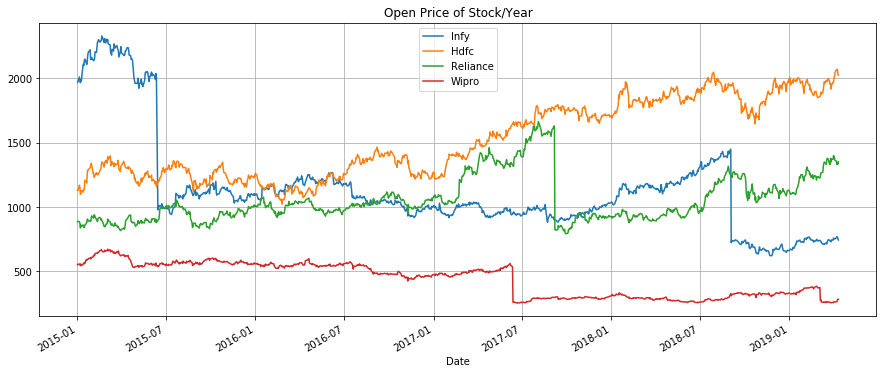

In [54]:
open_prices.plot(title = 'Open Price of Stock/Year',figsize=(15,6)).grid(True)
plt.legend()

#### 2. Use the dataframe open_prices created in qn 1 to create open_yearly with mean open prices every year. Create a bar chart with stock name on X-axis and price on Y-axis. The resulting plot will have multiple bar plot comparing price of each stock for 2015, 2016 and 2017. The legend should specify which colored bar represents which year for each stock.

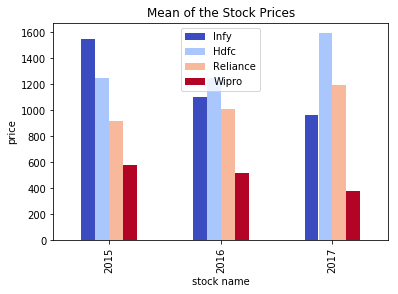

In [50]:
open_price=open_prices[open_prices.index.year.isin([2015,2016,2017])]
open_price=open_price.groupby(open_price.index.year).mean()
open_price.plot(kind='bar',title='Mean of the Stock Prices', colormap = 'coolwarm')
plt.xlabel('stock name')
plt.ylabel('price')
plt.legend()

#### 3. Plot 4 different line plots for the 4 companies in dataframe open_prices. Year would be on X-axis, stock price on Y axis, you will need (2,2) plot. Set figure size to 10, 8 and share X-axis for better visualization.

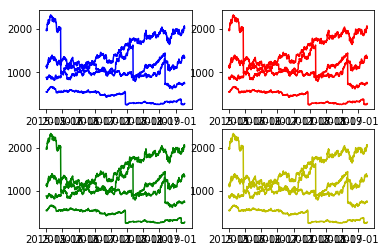

In [52]:
fig=plt.figure()
plt.subplot(221)
plt.plot(open_prices,'b')

plt.subplot(222) 
plt.plot(open_prices,'r')

plt.subplot(223) 
plt.plot(open_prices,'g')

plt.subplot(224) 
plt.plot(open_prices,'y');

#### 4. Get the stock prices for TCS for the same time period and plot a line graph with two lines representing daily high and low prices respectively.

In [7]:
tcs = get_history(symbol='TCS', start = start, end = end)
tcs.index = pd.to_datetime(tcs.index)
tcs.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-01-01,TCS,EQ,2558.25,2567.0,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+13,8002,52870,0.2883
2015-01-02,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683
2015-01-05,TCS,EQ,2579.45,2581.0,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+14,43234,456728,0.5207
2015-01-06,TCS,EQ,2540.25,2529.1,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+14,84503,714306,0.5894
2015-01-07,TCS,EQ,2446.60,2470.0,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+14,101741,886368,0.6724


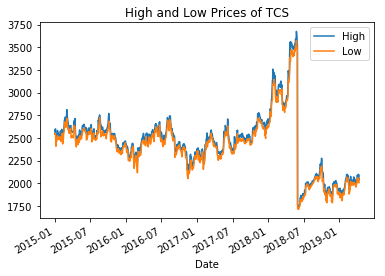

In [48]:
tcs[['High','Low']].plot(title = 'High and Low Prices of TCS')

#### 5. Create 3 pie charts from the open_prices dataframe, each representing % mean prices of stocks per year. You should get three charts for year 2015, 2016 and 2017 respectively. Try the parameter layout = (2,2) to get 2 plots on each row.

In [15]:
open_price=open_prices[open_prices.index.year.isin([2015,2016,2017])]
open_price=open_price.groupby(open_price.index.year).mean()
open_price.head()

,Infy,Hdfc,Reliance,Wipro
Date,,,,
2015,1550.506855,1251.421371,916.047177,580.706452
2016,1101.763765,1247.437247,1014.485830,520.401417
2017,963.428629,1592.671573,1195.694556,379.542540


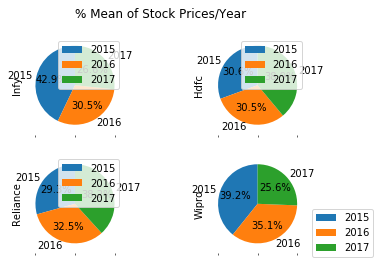

In [47]:
open_price.plot(kind='pie',subplots=True,layout=(2,2),startangle=90,autopct='%1.1f%%',title = '% Mean of Stock Prices/Year')
plt.legend(loc='best',bbox_to_anchor=(1,0.5), labels=open_price.index)